## Task needed make RFM Clustering model (customer segmentation)

- What is RFM (recency, frequency, monetary) analysis?
- RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

- RFM analysis ranks each customer on the following factors:

- Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

- Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

- Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

- Steps as below:

- Aggregating and computing RFM variables for each ID.
- Assigning RFM score.
- Segmenting customers according to scorings.
- Analyzing characteristics/trait of targeted clusters members

## Features explanation
- Trx_Rank  --> The number of transaction of this user with this merchant(Frequency).
- Points  --> The Number of points redeemed in this transaction
- Trx_Vlu  --> the equivalent values in pound to the redeemed points(Monetary).
- Trx_Age  --> how many days this transaction was done.(Recency)
- Customer_Age  --> the number of days from which the user made his last transaction ever
- Category In English  --> the category of the merchant
- User_Id  
- Mer_Id

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler

In [2]:
Data=pd.read_csv(r'E:\Data science 2022-Epsilon\Training\Project 4\Cleaned_Data_Merchant_Level.csv')
Data.head(5)

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0


In [3]:
Data.shape

(43672, 8)

In [4]:
Data.duplicated().sum()

0

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


In [6]:
import  warnings 
warnings.filterwarnings('ignore')

In [7]:
NUM_cols=Data.select_dtypes(include=np.number).columns
NUM_cols

Index(['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age', 'User_Id',
       'Mer_Id'],
      dtype='object')

In [8]:
round(Data.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Trx_Rank,43672.0,1.3,0.8,1.0,1.0,1.0,1.0,17.0
Points,43672.0,3312.2,5756.4,20.0,1220.0,1893.5,3100.0,263800.0
Trx_Vlu,43672.0,331.2,575.6,2.0,122.0,189.4,310.0,26380.0
Trx_Age,43672.0,185.2,122.0,1.0,62.0,203.0,271.0,698.0
Customer_Age,43672.0,144.0,114.8,1.0,34.0,115.0,252.0,682.0
User_Id,43672.0,17173.4,9665.4,0.0,8710.8,17561.0,25634.2,33518.0
Mer_Id,43672.0,16.3,16.1,0.0,8.0,8.0,26.0,56.0


In [9]:
CAt_col=Data.select_dtypes('object').columns
CAt_col

Index(['Category In English'], dtype='object')

## Make RFM analysis

In [10]:
rfm=Data.groupby("User_Id").agg({'Trx_Rank':lambda x:len(x),'Trx_Age':lambda x:x.max(),'Trx_Vlu':lambda x:x.sum()})

In [11]:
rfm_columns=rfm.rename(columns={'Trx_Rank':'Frequency','Trx_Age':'Recency','Trx_Vlu':'Monetary'})

rfm_columns

,Frequency,Recency,Monetary
User_Id,,,
0,1,281,442.7
1,1,34,249.0
2,1,236,300.0
3,1,320,162.0
4,1,407,70.0
...,...,...,...
33514,3,268,594.0
33515,1,244,48.0
33516,1,256,132.0


In [12]:
round(rfm_columns.describe(),2)

,Frequency,Recency,Monetary
count,33457.00,33457.00,33457.00
mean,1.31,197.69,432.35
std,0.85,120.97,1306.34
min,1.00,1.00,2.00
25%,1.00,78.00,150.00
50%,1.00,229.00,216.00
75%,1.00,280.00,364.00
max,29.00,698.00,165183.80


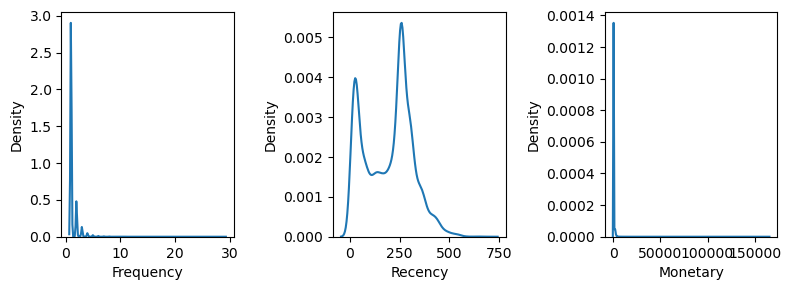

In [13]:
fig = plt.figure(figsize= (8,3))
for i, col in enumerate(rfm_columns):
    
    ax=fig.add_subplot(1,3,i+1)
    
    sns.kdeplot(x=rfm_columns[col], ax=ax)
    
fig.tight_layout()  
plt.show()

<Axes: >

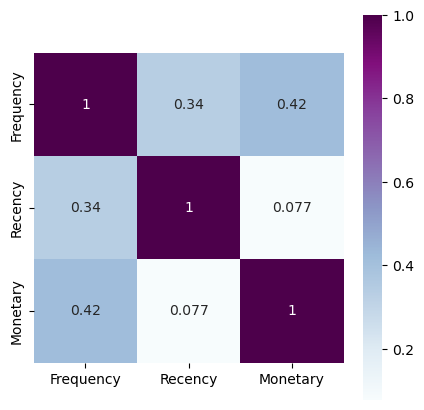

In [14]:
## check the correlation in data.
matrix = rfm_columns.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

## Make RFM Score

In [15]:
def get_rfm_scores(dataframe):

    dataframe["recency_score"] = pd.qcut(dataframe['Recency'], 5, labels=[5, 4, 3, 2, 1])
    dataframe["frequency_score"] = pd.qcut(dataframe['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.qcut(dataframe['Monetary'], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_SCORE"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)

    return dataframe

get_rfm_scores(rfm_columns)
rfm_columns = rfm_columns.reset_index()
rfm_columns.head()

,User_Id,Frequency,Recency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,0,1,281,442.7,2,1,5,21
1,1,1,34,249.0,5,1,3,51
2,2,1,236,300.0,3,1,4,31
3,3,1,320,162.0,1,1,2,11
4,4,1,407,70.0,1,1,1,11


In [16]:
rfm_columns.sample(5)

,User_Id,Frequency,Recency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
27252,27308,1,99,256.0,4,4,4,44
20589,20610,1,187,321.1,3,3,4,33
10304,10312,7,269,10826.0,2,5,5,25
13204,13213,1,251,118.0,3,2,1,32
15302,15312,1,234,175.3,3,2,2,32


In [17]:
RFM_Data=rfm_columns.copy()

In [18]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

RFM_Data['segment'] = RFM_Data['RFM_SCORE'].replace(seg_map, regex = True)

RFM_Data.head()

,User_Id,Frequency,Recency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,0,1,281,442.7,2,1,5,21,hibernating
1,1,1,34,249.0,5,1,3,51,new_customers
2,2,1,236,300.0,3,1,4,31,about_to_sleep
3,3,1,320,162.0,1,1,2,11,hibernating
4,4,1,407,70.0,1,1,1,11,hibernating


In [19]:
RFM_Data.sample(10)

,User_Id,Frequency,Recency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
2740,2743,1,20,156.0,5,1,2,51,new_customers
25552,25582,2,271,4271.0,2,5,5,25,cant_loose
18614,18628,2,306,252.4,1,5,3,15,cant_loose
9365,9372,1,251,121.8,3,2,1,32,about_to_sleep
15817,15827,1,101,40.0,4,3,1,43,potential_loyalists
739,739,1,116,190.0,4,1,3,41,promising
175,175,1,296,83.3,2,1,1,21,hibernating
21229,21252,1,250,150.0,3,3,2,33,need_attention
17620,17633,1,160,1161.6,4,3,5,43,potential_loyalists
23682,23707,2,250,171.8,3,5,2,35,loyal_customers


<Axes: xlabel='segment', ylabel='User_Id'>

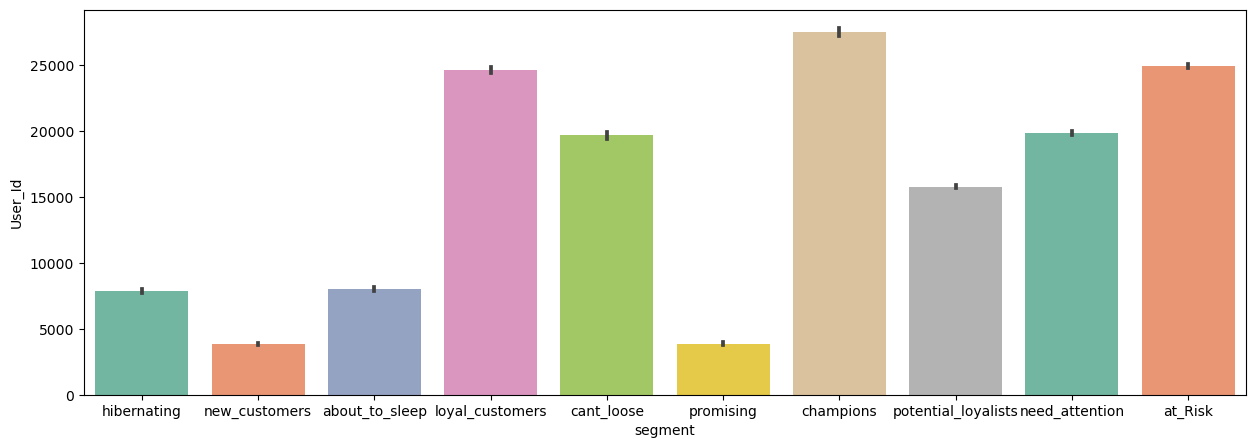

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='segment', y='User_Id',data=RFM_Data,palette='Set2')

<Axes: xlabel='Recency', ylabel='Frequency'>

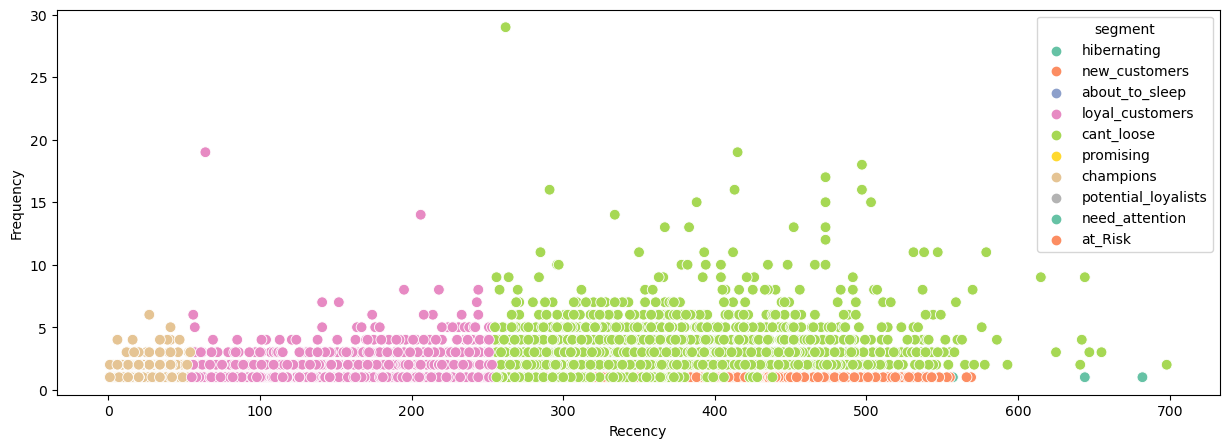

In [21]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=RFM_Data, x="Recency", y="Frequency", hue="segment", palette='Set2', s=60)


<Axes: xlabel='segment', ylabel='Recency'>

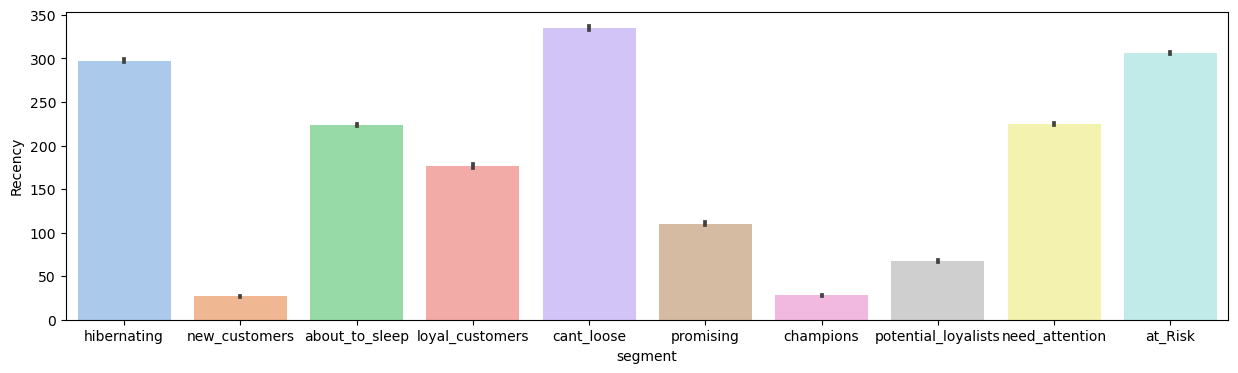

In [22]:
plt.figure(figsize=(15,4))
sns.barplot(x="segment", y='Recency',data=RFM_Data,palette='pastel')

<Axes: xlabel='segment', ylabel='Frequency'>

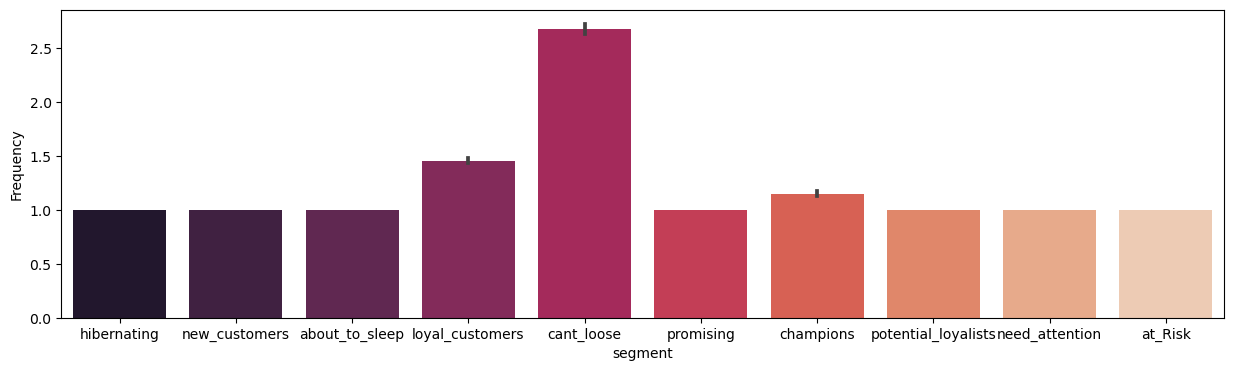

In [23]:
plt.figure(figsize=(15,4))
sns.barplot(x="segment", y="Frequency",data=RFM_Data,palette='rocket')

<Axes: xlabel='segment', ylabel='Monetary'>

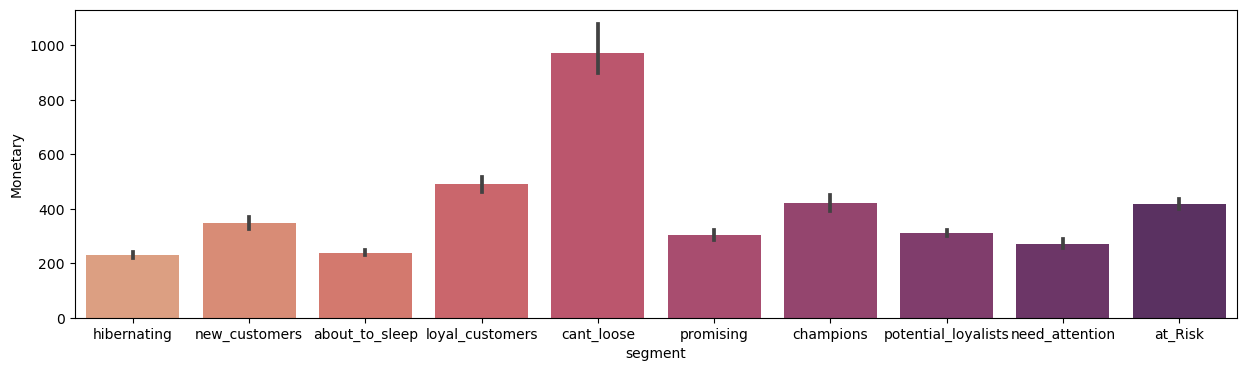

In [24]:
plt.figure(figsize=(15,4))
sns.barplot(x="segment", y='Monetary',data=RFM_Data,palette='flare')

## insights
- Frequency and monetray of customer effective in RFM as  if the number of transaction and amount of this users increasing its make them championes
- But Recency it's most effective in RFM as when Recency of customer decreasing make most of users hibernating.

## MAke merge with RFM data with orgenal data to make some of analysis.

In [25]:
Merged_RFM_Data=pd.merge(Data,RFM_Data,on='User_Id',how ='inner')
Merged_RFM_Data.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Frequency,Recency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,1,20140,2014.0,362,362,Fashion,21053,0,1,362,2014.0,1,3,5,13,at_Risk
1,1,11200,1120.0,371,368,Fashion,26472,0,2,371,1970.0,1,5,5,15,cant_loose
2,2,8500,850.0,368,368,Fashion,26472,0,2,371,1970.0,1,5,5,15,cant_loose
3,1,1980,198.0,558,34,Fashion,27075,0,3,558,900.0,1,5,5,15,cant_loose
4,1,2860,286.0,327,34,Fashion,27075,29,3,558,900.0,1,5,5,15,cant_loose


<Axes: xlabel='Category In English', ylabel='count'>

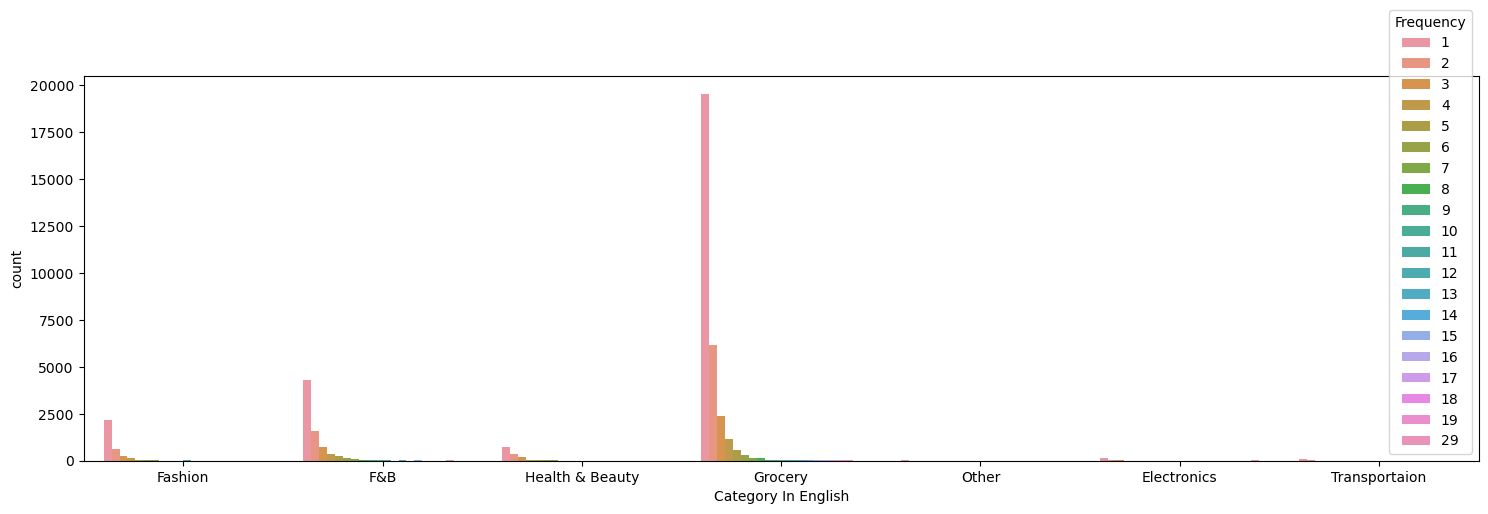

In [26]:
fig = plt.figure(figsize= (18,5))
sns.countplot(data=Merged_RFM_Data,x='Category In English',hue='Frequency')

- Most of Customer redeemed points in Grogory then F&B

In [27]:
pd.pivot_table(data=Merged_RFM_Data , index = 'Category In English' , columns = 'segment' , values = 'User_Id' , aggfunc=len)

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
Category In English,,,,,,,,,,
Electronics,15.0,27.0,84.0,10.0,29.0,25.0,5.0,7.0,19.0,7.0
F&B,458.0,1021.0,2909.0,247.0,827.0,815.0,217.0,263.0,819.0,144.0
Fashion,235.0,338.0,835.0,189.0,254.0,520.0,92.0,167.0,540.0,163.0
Grocery,2149.0,3122.0,8128.0,1385.0,2518.0,4955.0,1024.0,1246.0,4944.0,1223.0
Health & Beauty,63.0,183.0,673.0,33.0,157.0,112.0,19.0,57.0,158.0,49.0
Other,1.0,3.0,24.0,5.0,2.0,4.0,NaN,2.0,3.0,3.0
Transportaion,8.0,26.0,19.0,5.0,12.0,29.0,12.0,4.0,23.0,8.0


<Axes: xlabel='segment', ylabel='count'>

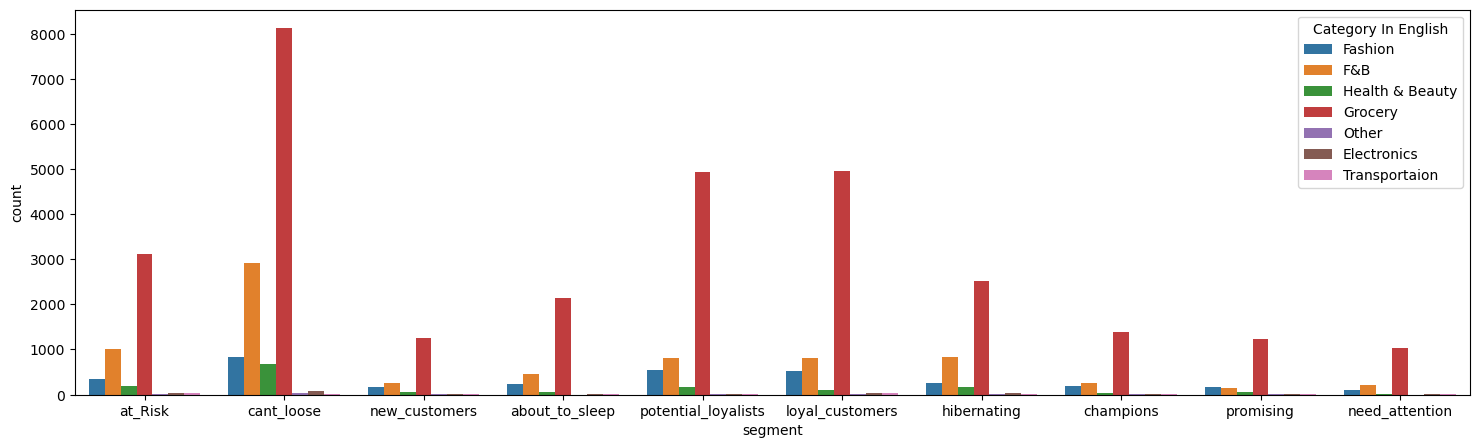

In [28]:
fig = plt.figure(figsize= (18,5))
sns.countplot(data=Merged_RFM_Data,x='segment',hue='Category In English')

- most of Customer in Grocery is loyal customers then F&B and fashion.

<Axes: xlabel='Category In English', ylabel='Mer_Id'>

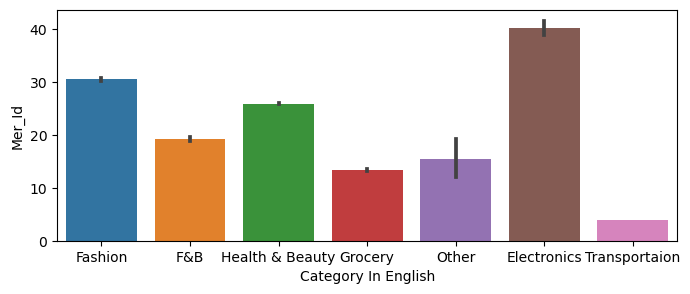

In [29]:
fig = plt.figure(figsize= (8,3))
sns.barplot(x='Category In English',y="Mer_Id",data=Merged_RFM_Data)

## Prepare data for Model

In [30]:
RFM=rfm_columns.drop(['recency_score','frequency_score','monetary_score', 'RFM_SCORE'],axis=1,inplace=True)

In [31]:
rfm_columns.reset_index(drop = True , inplace = True)

In [32]:
rfm_columns

,User_Id,Frequency,Recency,Monetary
0,0,1,281,442.7
1,1,1,34,249.0
2,2,1,236,300.0
3,3,1,320,162.0
4,4,1,407,70.0
...,...,...,...,...
33452,33514,3,268,594.0
33453,33515,1,244,48.0
33454,33516,1,256,132.0
33455,33517,1,13,210.0


In [33]:
RFM_Data_log = rfm_columns[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

In [34]:
RFM_Data_log.head()

,Recency,Frequency,Monetary
0,5.638,0.0,6.093
1,3.526,0.0,5.517
2,5.464,0.0,5.704
3,5.768,0.0,5.088
4,6.009,0.0,4.248


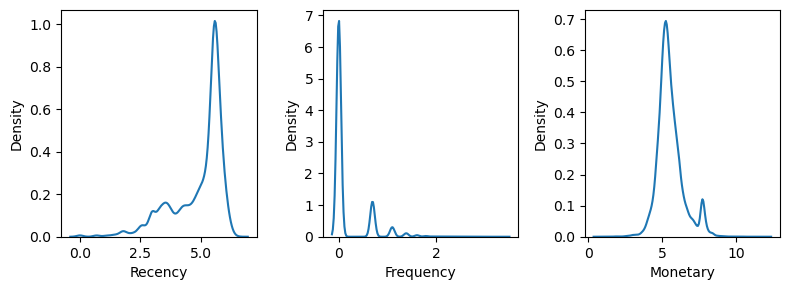

In [35]:
fig = plt.figure(figsize= (8,3))
for i, col in enumerate(RFM_Data_log):
    
    ax=fig.add_subplot(1,3,i+1)
    
    sns.kdeplot(x=RFM_Data_log[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [36]:
RFM_Data_log.describe()

,Recency,Frequency,Monetary
count,33457.000000,33457.000000,33457.000000
mean,4.924678,0.169238,5.530517
std,1.062639,0.376513,0.876007
min,0.000000,0.000000,0.693000
25%,4.357000,0.000000,5.011000
50%,5.434000,0.000000,5.375000
75%,5.635000,0.000000,5.897000
max,6.548000,3.367000,12.015000


## Feature Scaling

In [37]:
from sklearn.preprocessing import RobustScaler
columns=['Recency', 'Frequency', 'Monetary']
scaler = RobustScaler()
scaler.fit(RFM_Data_log[columns])
scaler.transform(RFM_Data_log[columns])
RFM_Data_log[columns] =scaler.transform(RFM_Data_log[columns])

In [38]:
RFM_Data_log

,Recency,Frequency,Monetary
0,0.159624,0.000,0.810384
1,-1.492958,0.000,0.160271
2,0.023474,0.000,0.371332
3,0.261346,0.000,-0.323928
4,0.449922,0.000,-1.272009
...,...,...,...
33452,0.122848,1.099,1.142212
33453,0.049296,0.000,-1.697517
33454,0.086854,0.000,-0.555305
33455,-2.244914,0.000,-0.031603


In [39]:
RFM=RFM_Data_log.copy()

## K- Means Clustering

In [40]:
from sklearn.cluster import KMeans

## Elbow method

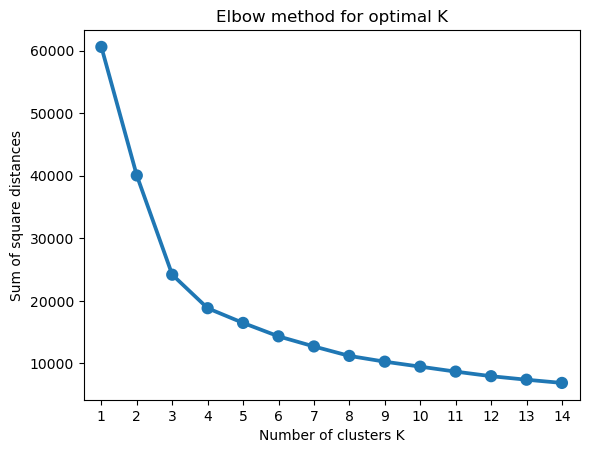

In [41]:
wcss={}

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(RFM_Data_log)
    wcss[k] = km.inertia_
    
#Plot graph for the wcss values and the number of clusters
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of square distances')
plt.title('Elbow method for optimal K')
plt.show()


- Observation: Choose the value K=4

In [42]:
# A list holds the silhouette coefficients for each k
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(RFM_Data_log)
    score = silhouette_score(RFM_Data_log, kmeans.labels_)
    silhouette_coefficients.append(score)

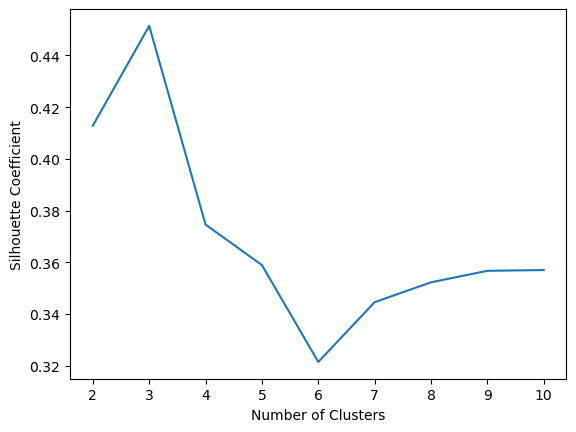

In [43]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [44]:
from kneed import KneeLocator
kl = KneeLocator(range(3, 11), silhouette_coefficients[1:], curve="convex", direction="decreasing")

kl.elbow

6

In [45]:
#Build K Means clustering model using K=4
kmean_model = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(RFM_Data_log)

#find the clusters for the records given in our dataset
RFM_Data_log['Cluster'] = kmean_model.labels_

#check the datset
RFM_Data_log.head()

,Recency,Frequency,Monetary,Cluster
0,0.159624,0.0,0.810384,3
1,-1.492958,0.0,0.160271,0
2,0.023474,0.0,0.371332,2
3,0.261346,0.0,-0.323928,2
4,0.449922,0.0,-1.272009,5


In [46]:
RFM_Data_log.Cluster.value_counts()

2    11962
5     5986
0     5180
3     4983
4     2904
1     2442
Name: Cluster, dtype: int64

<Figure size 700x700 with 0 Axes>

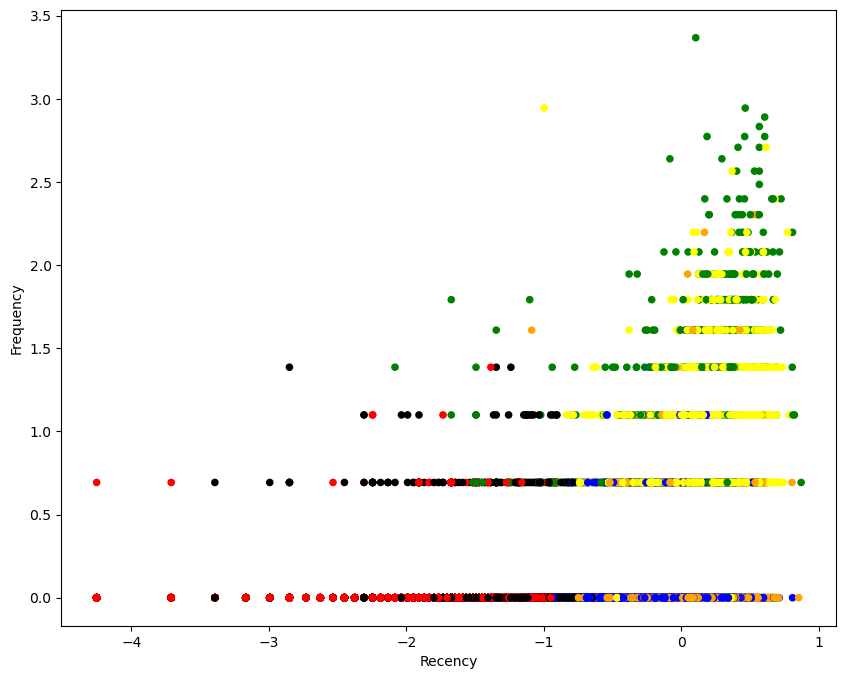

In [48]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","yellow","black","orange"]
RFM_Data_log['Color'] = RFM_Data_log['Cluster'].map(lambda p: Colors[p])
ax = RFM_Data_log.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFM_Data_log['Color']
)

In [49]:
RFM_Data_log.head(10)

,Recency,Frequency,Monetary,Cluster,Color
0,0.159624,0.000,0.810384,3,yellow
1,-1.492958,0.000,0.160271,0,red
2,0.023474,0.000,0.371332,2,blue
3,0.261346,0.000,-0.323928,2,blue
4,0.449922,0.000,-1.272009,5,orange
5,-1.798905,0.000,-0.384876,0,red
6,-0.125978,0.000,0.251693,2,blue
7,0.211268,0.000,0.113995,2,blue
8,-0.379499,0.693,1.714447,1,green
9,0.125978,0.000,-0.835214,5,orange


<Axes: xlabel='Frequency', ylabel='Recency'>

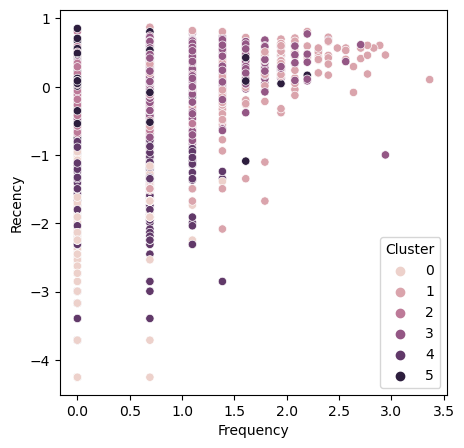

In [50]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = RFM_Data_log, x='Frequency', y='Recency', hue='Cluster')

<Axes: xlabel='Monetary', ylabel='Recency'>

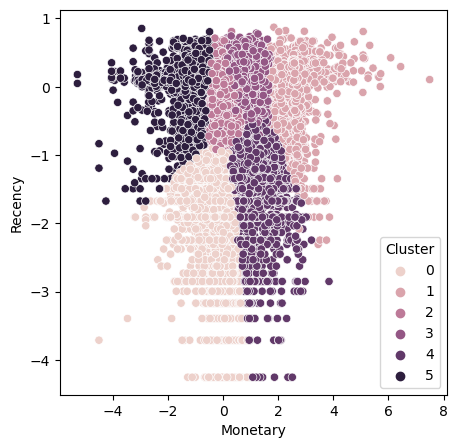

In [51]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = RFM_Data_log, x='Monetary', y='Recency', hue='Cluster')

In [125]:
RFM_Data_log.groupby('Cluster').agg(['mean'])

,Recency,Frequency,Monetary
,mean,mean,mean
Cluster,,,
0,0.073970,0.080727,0.343806
1,-0.283107,0.411634,2.296645
2,-1.037264,0.183875,0.213498
3,0.141392,0.023550,-0.682222


In [126]:
Merge_user =pd.concat([Data, RFM_Data_log], axis="columns")
Merge_user.drop(['Trx_Rank','Points','Trx_Vlu','Trx_Age','Customer_Age'],axis=1,inplace=True)

In [127]:
Merge_user

,Category In English,User_Id,Mer_Id,Recency,Frequency,Monetary,Cluster,Color
0,Fashion,21053,0,0.326099,0.0,0.810384,0.0,red
1,Fashion,26472,0,-0.819859,0.0,0.160271,2.0,blue
2,Fashion,26472,0,0.231687,0.0,0.371332,0.0,red
3,Fashion,27075,0,0.396636,0.0,-0.323928,3.0,yellow
4,Fashion,27417,0,0.527401,0.0,-1.272009,3.0,yellow
...,...,...,...,...,...,...,...,...
43667,F&B,26865,55,NaN,NaN,NaN,NaN,NaN
43668,F&B,27128,55,NaN,NaN,NaN,NaN,NaN
43669,F&B,28814,55,NaN,NaN,NaN,NaN,NaN
43670,Other,29107,56,NaN,NaN,NaN,NaN,NaN


In [128]:
px.histogram(data_frame=Merge_user , x ="Cluster" , color="Category In English" ,barmode='group' , text_auto=True)

#### insights
- Cluster 3 have most of users.
- Most of users in Class 3 and from Grocery about 8729K then F&B 1816K and then class 2 have 7976 in Grocery and 1543 in F&B.
